# CNN version Laser Machine Listener: Training AlexNet based model

This is additional attempt to train AlexNet based lighter model.

__This shows better result than MobileNetV2 result, smaller model fits to this problem.__

In [1]:
import sys
sys.path.append('../..')
from lib_train import *
%matplotlib inline

X_train, y_train = load_audio_datafiles(conf, 'X_train.npy', 'y_train.npy', normalize=True)
X_test, y_test = load_audio_datafiles(conf, 'X_test.npy', 'y_test.npy', normalize=True)
print('Loaded train:test = %d:%d samples.' % (len(X_train), len(X_test)))

{'sampling_rate': 16000, 'duration': 1, 'hop_length': 253, 'fmin': 20, 'fmax': 8000, 'n_mels': 64, 'n_fft': 1280, 'labels': ['background', 'cutting_in_focus', 'cutting_not_in_focus', 'marking', 'sleeping', 'waiting'], 'folder': PosixPath('.'), 'n_fold': 1, 'normalize': 'samplewise', 'valid_limit': None, 'random_state': 42, 'samples_per_file': 30, 'test_size': 0.2, 'batch_size': 32, 'learning_rate': 0.0001, 'epochs': 50, 'verbose': 2, 'best_weight_file': 'best_model_weight.h5', 'eval_ensemble': False, 'rt_process_count': 1, 'rt_oversamples': 10, 'pred_ensembles': 10, 'runtime_model_file': 'cnn-model-laser-machine-listener.pb', 'label2int': {'background': 0, 'cutting_in_focus': 1, 'cutting_not_in_focus': 2, 'marking': 3, 'sleeping': 4, 'waiting': 5}, 'num_classes': 6, 'samples': 16000, 'rt_chunk_samples': 1600, 'mels_onestep_samples': 1600, 'mels_convert_samples': 17600, 'dims': [64, 64, 1], 'model': 'mobilenetv2', 'metric_save_ckpt': 'val_loss', 'metric_save_mode': 'auto', 'logdir': 'lo

Using TensorFlow backend.


 normalize samplewise
 normalize samplewise
Loaded train:test = 288:72 samples.


## Train with pre-trained model, transfer learning

Using Freesound Dataset Kaggle 2018 pretrained AlexNet based model here. Also change of some settings:

- Data (class) balancing is now done by generator. Batch size is changed to twice of # of classes. These settings will have 2 samples from each class in every single batch, so that making better training.
- Epochs is now 200 to get results a little stabler.

In [2]:
import keras.backend as K
K.clear_session()

conf.best_weight_file = 'model_alexbased_on_fsd.h5'
conf.epochs = 200
conf.model = 'alexnet'
conf.batch_size = conf.num_classes * 2
conf.data_balancing = 'by_generator'
history, model = train_classifier(conf, fold=0,
                                  dataset=[X_train, y_train], 
                                  model=None, 
                                  init_weights='../../model/alexbased_small_fsd2018_41cls.h5')
evaluate_model(conf, model, X_test, y_test) 
print('___ training finished ___')

----- Fold #0 ----
 Dataset is not balanced so far, conf.data_balancing = by_generator
 Using normal data generator, with class balancing
 train_steps_per_epoch, valid_steps_per_epoch = 19, 4
Model: AlexNet based
Loading weights: ../../model/alexbased_small_fsd2018_41cls.h5
Epoch 1/200
 - 1s - loss: 1.7713 - acc: 0.2675 - val_loss: 1.5222 - val_acc: 0.3793

Epoch 00001: val_loss improved from inf to 1.52221, saving model to model_alexbased_on_fsd.h5
Epoch 2/200
 - 0s - loss: 1.5347 - acc: 0.4605 - val_loss: 1.3038 - val_acc: 0.5517

Epoch 00002: val_loss improved from 1.52221 to 1.30378, saving model to model_alexbased_on_fsd.h5
Epoch 3/200
 - 0s - loss: 1.4351 - acc: 0.5132 - val_loss: 1.1593 - val_acc: 0.6724

Epoch 00003: val_loss improved from 1.30378 to 1.15929, saving model to model_alexbased_on_fsd.h5
Epoch 4/200
 - 0s - loss: 1.2893 - acc: 0.6272 - val_loss: 0.9367 - val_acc: 0.9310

Epoch 00004: val_loss improved from 1.15929 to 0.93671, saving model to model_alexbased_on_fsd.


Epoch 00048: val_loss did not improve from 0.10546
Epoch 49/200
 - 0s - loss: 0.6705 - acc: 0.8553 - val_loss: 0.1120 - val_acc: 1.0000

Epoch 00049: val_loss did not improve from 0.10546
Epoch 50/200
 - 0s - loss: 0.6384 - acc: 0.8509 - val_loss: 0.1010 - val_acc: 1.0000

Epoch 00050: val_loss improved from 0.10546 to 0.10105, saving model to model_alexbased_on_fsd.h5
Epoch 51/200
 - 0s - loss: 0.6611 - acc: 0.8202 - val_loss: 0.0922 - val_acc: 1.0000

Epoch 00051: val_loss improved from 0.10105 to 0.09219, saving model to model_alexbased_on_fsd.h5
Epoch 52/200
 - 0s - loss: 0.6651 - acc: 0.8377 - val_loss: 0.0864 - val_acc: 1.0000

Epoch 00052: val_loss improved from 0.09219 to 0.08642, saving model to model_alexbased_on_fsd.h5
Epoch 53/200
 - 0s - loss: 0.6322 - acc: 0.8596 - val_loss: 0.0869 - val_acc: 1.0000

Epoch 00053: val_loss did not improve from 0.08642
Epoch 54/200
 - 0s - loss: 0.6651 - acc: 0.8728 - val_loss: 0.0875 - val_acc: 1.0000

Epoch 00054: val_loss did not improv

 - 0s - loss: 0.5945 - acc: 0.8772 - val_loss: 0.1003 - val_acc: 1.0000

Epoch 00106: val_loss did not improve from 0.05989
Epoch 107/200
 - 0s - loss: 0.5904 - acc: 0.8816 - val_loss: 0.1042 - val_acc: 1.0000

Epoch 00107: val_loss did not improve from 0.05989
Epoch 108/200
 - 0s - loss: 0.6010 - acc: 0.8553 - val_loss: 0.0778 - val_acc: 1.0000

Epoch 00108: val_loss did not improve from 0.05989
Epoch 109/200
 - 0s - loss: 0.6111 - acc: 0.8333 - val_loss: 0.1155 - val_acc: 1.0000

Epoch 00109: val_loss did not improve from 0.05989
Epoch 110/200
 - 0s - loss: 0.5867 - acc: 0.8728 - val_loss: 0.1011 - val_acc: 1.0000

Epoch 00110: val_loss did not improve from 0.05989
Epoch 111/200
 - 0s - loss: 0.5828 - acc: 0.8684 - val_loss: 0.0790 - val_acc: 1.0000

Epoch 00111: val_loss did not improve from 0.05989
Epoch 112/200
 - 0s - loss: 0.5737 - acc: 0.8553 - val_loss: 0.0822 - val_acc: 1.0000

Epoch 00112: val_loss did not improve from 0.05989
Epoch 113/200
 - 0s - loss: 0.5774 - acc: 0.8904


Epoch 00164: val_loss did not improve from 0.04711
Epoch 165/200
 - 0s - loss: 0.5875 - acc: 0.8509 - val_loss: 0.0657 - val_acc: 1.0000

Epoch 00165: val_loss did not improve from 0.04711
Epoch 166/200
 - 0s - loss: 0.5809 - acc: 0.8684 - val_loss: 0.0688 - val_acc: 1.0000

Epoch 00166: val_loss did not improve from 0.04711
Epoch 167/200
 - 0s - loss: 0.5899 - acc: 0.8640 - val_loss: 0.0615 - val_acc: 1.0000

Epoch 00167: val_loss did not improve from 0.04711
Epoch 168/200
 - 0s - loss: 0.5593 - acc: 0.8640 - val_loss: 0.0679 - val_acc: 1.0000

Epoch 00168: val_loss did not improve from 0.04711
Epoch 169/200
 - 0s - loss: 0.5369 - acc: 0.8860 - val_loss: 0.0691 - val_acc: 1.0000

Epoch 00169: val_loss did not improve from 0.04711
Epoch 170/200
 - 0s - loss: 0.5704 - acc: 0.8596 - val_loss: 0.0804 - val_acc: 0.9828

Epoch 00170: val_loss did not improve from 0.04711
Epoch 171/200
 - 0s - loss: 0.5876 - acc: 0.8509 - val_loss: 0.0513 - val_acc: 1.0000

Epoch 00171: val_loss did not imp

# Visualize class activation map

We got reliable results. This model almost looks at where spectrogram contents are.

These results suggest that AlexNet based model (or some more smaller model) is better for this problem.

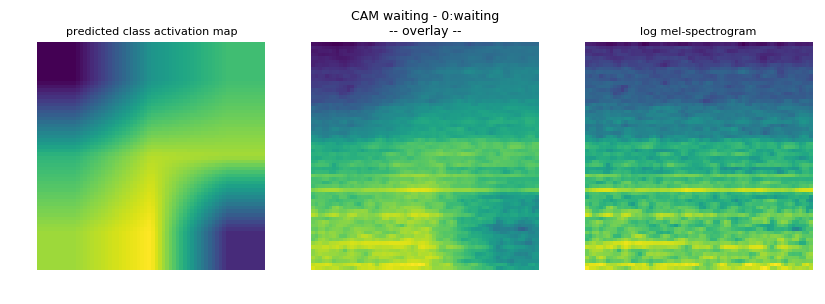

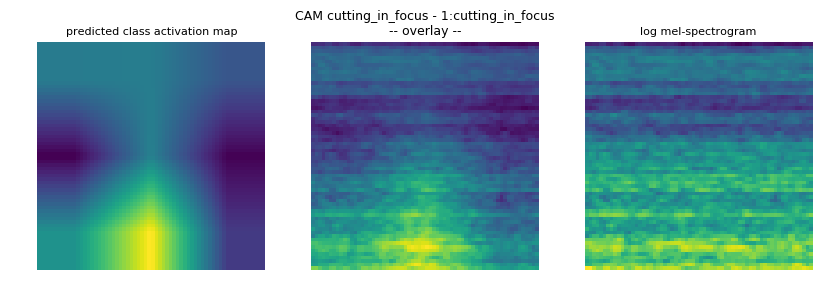

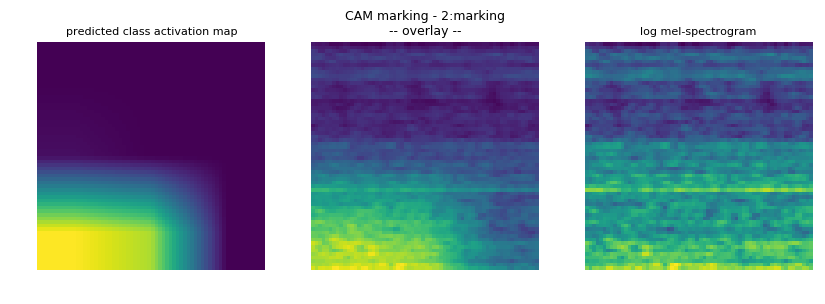

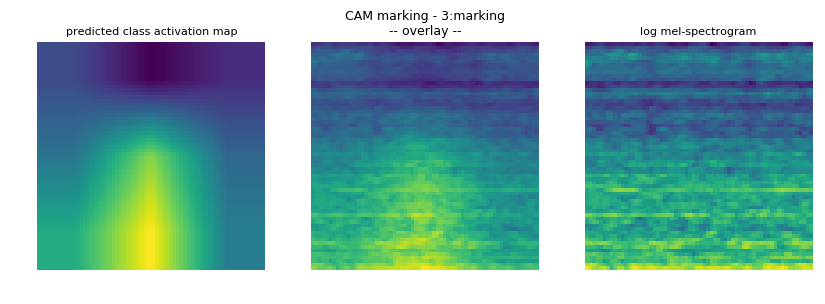

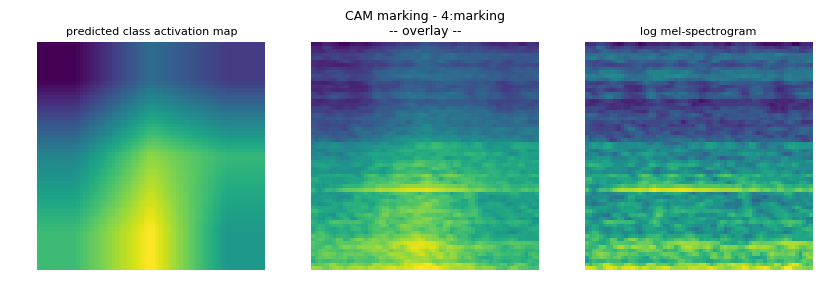

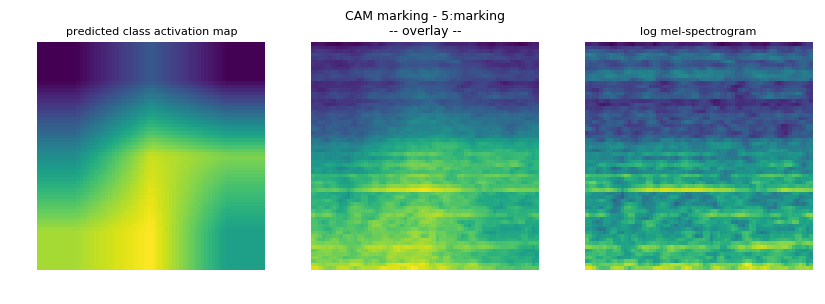

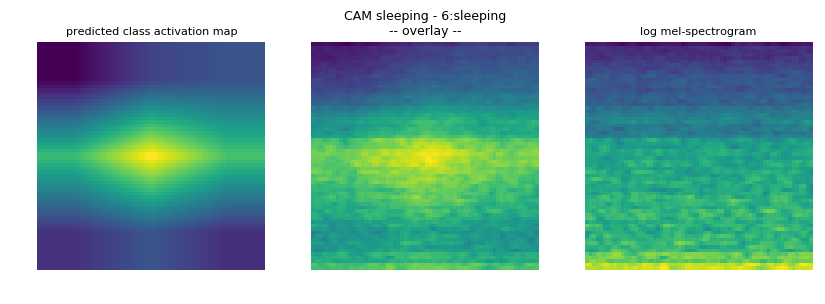

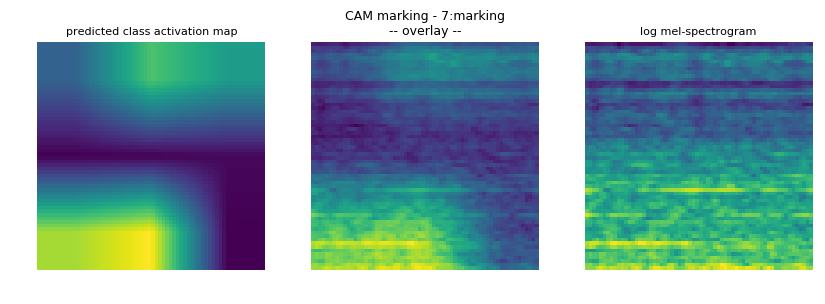

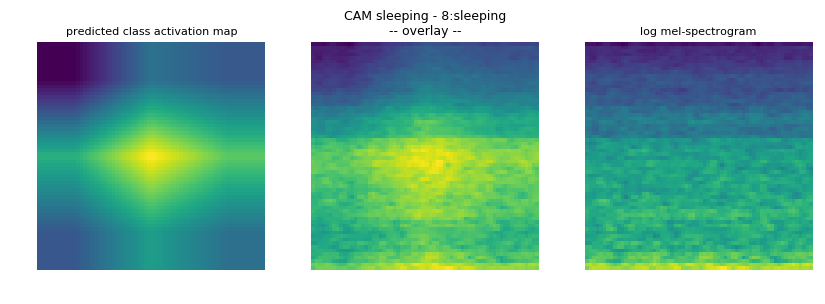

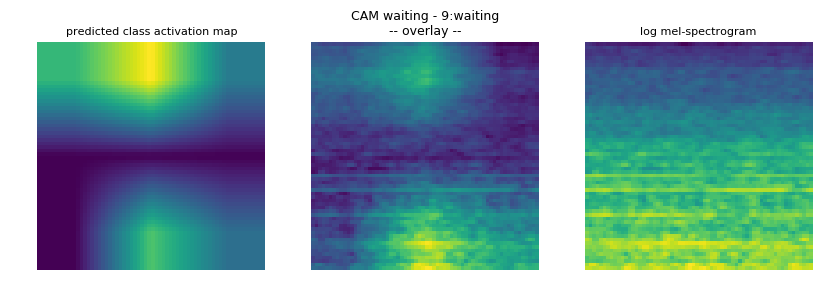

In [3]:
from visualize import visualize_cam_audio

model.load_weights('model_alexbased_on_fsd.h5')
offset = 200
for i, x in enumerate(X_train[offset:offset+10]):
    visualize_cam_audio(conf, model, x, '{}:{}'.format(i, conf.labels[np.argmax(y_train[offset + i])]),
                  layer='last_conv')